In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df = df.drop(['User ID'],axis=1)

In [7]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["Gender"] = encoder.fit_transform(df["Gender"])

In [10]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [11]:
X = df.drop(['Purchased'],axis=1)
y = df['Purchased']

In [13]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
model.intercept_

array([-12.77376187])

In [22]:
model.coef_

array([[2.09390639e-01, 2.38115726e-01, 3.49534564e-05]])

In [23]:
model.score(X_test,y_test)

0.825

In [24]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(y_test,y_pred)

In [27]:
cm

array([[46,  2],
       [12, 20]], dtype=int64)

In [28]:
np.sum(cm)

80

In [29]:
np.sum(cm,axis=0)

array([58, 22], dtype=int64)

In [30]:
np.sum(cm,axis=1)

array([48, 32], dtype=int64)

<AxesSubplot:>

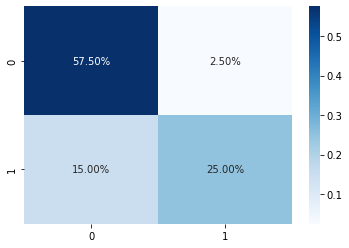

In [39]:
sns.heatmap(cm/np.sum(cm),annot=True,cmap='Blues',fmt='0.2%')

<AxesSubplot:>

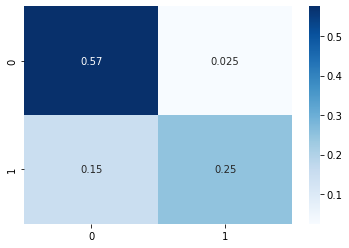

In [37]:
sns.heatmap(cm/np.sum(cm),annot=True,cmap='Blues')

In [68]:
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]

print(TP)
print(FP)
print(FN)
print(TN)

20
2
12
46


In [69]:
precision = TP/(TP+FP)
precision

0.9090909090909091

In [70]:
recall = TP/(TP+FN)
recall

0.625

In [71]:
f1_score = 2*precision*recall/(precision+recall)
f1_score

0.7407407407407406

In [72]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.825

In [48]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [49]:
fpr,tpr,_ = roc_curve(y_test,y_pred)

In [50]:
_

array([2, 1, 0], dtype=int64)

In [51]:
aoc_score = auc(fpr,tpr)

In [52]:
aoc_score

0.7916666666666667

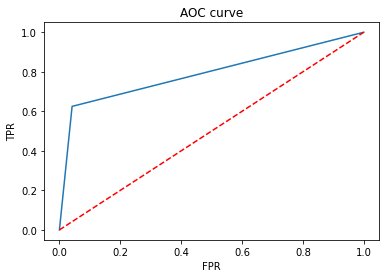

In [54]:
plt.plot(fpr,tpr,label="AOC = %0.2f"%aoc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AOC curve')
plt.show()

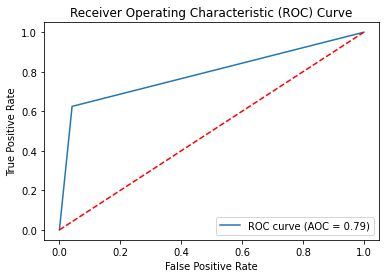

In [56]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
aoc_score = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AOC = %0.2f)' % aoc_score)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line indicating random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [58]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X,y,test_size=0.2)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [60]:
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

In [62]:
m = LogisticRegression()

In [63]:
m.fit(x1_train,y1_train)

LogisticRegression()

In [64]:
m.score(x1_test,y1_test)

0.8375

In [65]:
y1_pred = m.predict(x1_test)

In [73]:
cm1 = confusion_matrix(y1_test,y1_pred)
cm1

array([[43,  7],
       [ 6, 24]], dtype=int64)